# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Roysihan]
- **Email:** [roysihan208@gmail.com]
- **ID Dicoding:** [roysihan202]

## Menentukan Pertanyaan Bisnis

1. apa saja jam puncak peminjaman sepeda pada hari kerja dibandingka dengan akhir pekan?
2. Bagaimana perbandingan jumlah peminjaaman sepeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame

%matplotlib inline
sns.set_style("whitegrid")

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('https://raw.githubusercontent.com/Roysintax/proyek-analisis-data---bangkit/main/Dataset/day.csv')
df_hour = pd.read_csv('https://raw.githubusercontent.com/Roysintax/proyek-analisis-data---bangkit/main/Dataset/hour.csv')

print(df_day.head())
print(df_hour.head())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
   instant      dteday  se

Data dimuat dari dua file CSV yang dihosting di GitHub (df_day dan df_hour) menggunakan pd.read_csv(). Dataset ini berisi data harian dan jam yang terkait dengan proyek bike sharing data


### Assessing Data

In [4]:
print(df_day.info())
print(df_day.describe())
print(df_day.isnull().sum())

print(df_hour.info())
print(df_hour.describe())
print(df_hour.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday  \
count  

- .head(): Metode ini digunakan untuk mencetak lima baris pertama dari setiap dataset (df_day dan df_hour). Ini memberikan pandangan awal tentang jenis data yang terkandung dalam setiap kolom, termasuk contoh nilai.

- .info(): Metode ini menghasilkan ringkasan singkat tentang DataFrame, termasuk jumlah total baris, jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null. Ini membantu dalam mengidentifikasi kolom yang mungkin memiliki nilai hilang dan memerlukan pembersihan atau penanganan khusus.

- .describe(): Metode ini menghasilkan statistik deskriptif yang mencakup kecenderungan sentral, dispersi, dan bentuk distribusi dataset. Untuk kolom numerik, ini termasuk hitungan, mean, standar deviasi, minimum, kuartil, dan maksimum. Ini sangat berguna untuk mendapatkan pemahaman cepat tentang distribusi data numerik.

- .isnull().sum(): Metode ini digunakan untuk menghitung jumlah nilai yang hilang (NaN) di setiap kolom dari DataFrame. Ini adalah langkah penting dalam penilaian data karena memberikan wawasan tentang keberadaan dan sebaran nilai yang hilang dalam data, yang dapat mempengaruhi analisis lebih lanjut dan memerlukan penanganan sebelum melakukan analisis statistik atau pembuatan model.

### Cleaning Data

In [5]:
df_hour.fillna(method = 'ffill', inplace=True)
df_day.fillna(method='ffill', inplace = True)

- .fillna(method='ffill', inplace=True) digunakan untuk mengisi nilai yang hilang dalam kedua DataFrame df_hour dan df_day. Metode 'ffill' menyebarluaskan observasi valid terakhir ke depan ke
observasi valid berikutnya.

- Menetapkan inplace=True mengindikasikan bahwa modifikasi dilakukan langsung pada DataFrame yang ada tanpa perlu membuat salinan baru. Ini menghemat memori dan menjaga perubahan pada objek yang sama.

## Exploratory Data Analysis (EDA)

### Explore ...

Text(33.33860390946502, 0.5, 'Rata-rata Jumlah Peminjaman')

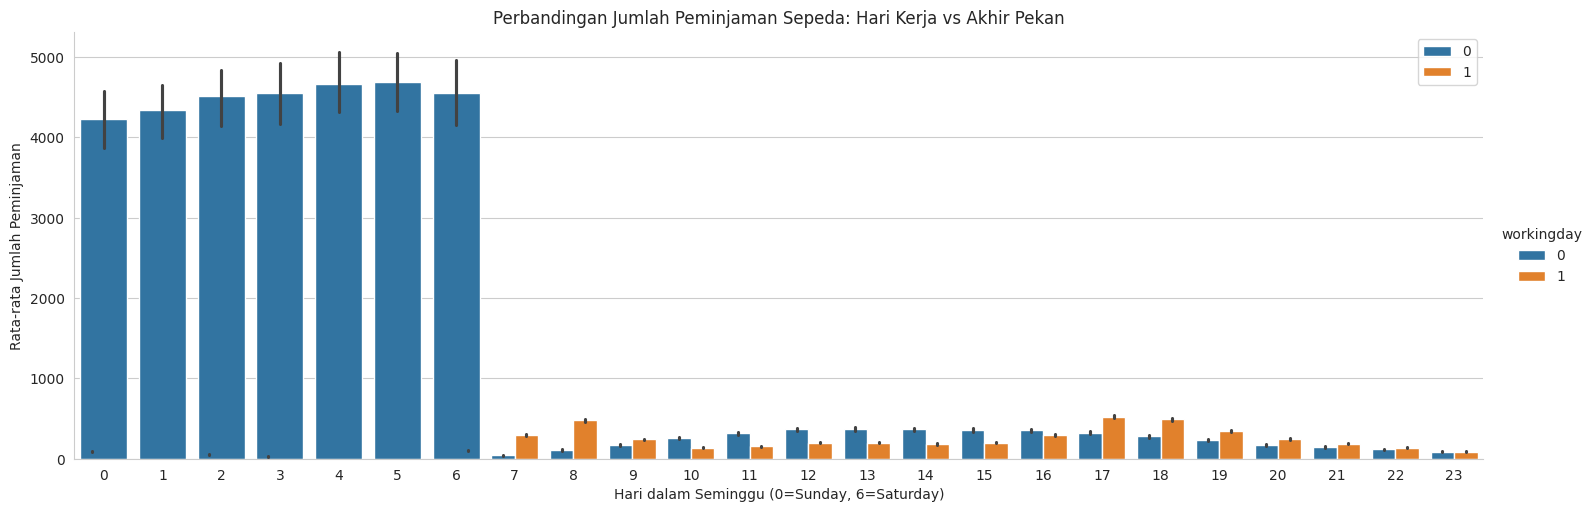

In [ ]:
sns.catplot(x='hr', y='cnt', hue='workingday', kind='bar', data=df_hour, aspect=3)
plt.title('Distribusi Peminjaman Sepeda per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')

sns.barplot(x='weekday', y='cnt', data=df_day)
plt.title('Perbandingan Jumlah Peminjaman Sepeda: Hari Kerja vs Akhir Pekan')
plt.xlabel('Hari dalam Seminggu (0=Sunday, 6=Saturday)')
plt.ylabel('Rata-rata Jumlah Peminjaman')

## Visualization & Explanatory Analysis

### Pertanyaan 1:

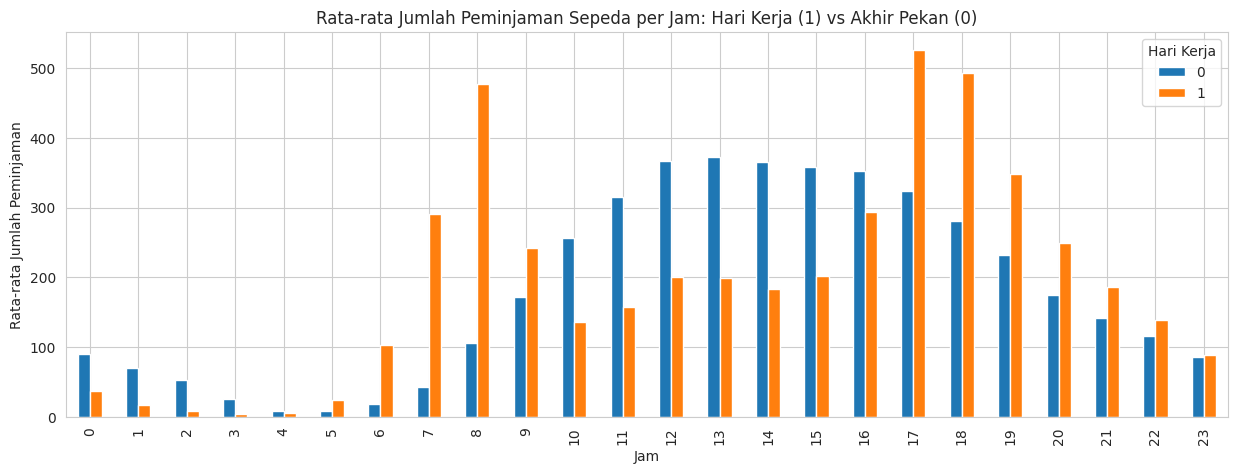

In [ ]:
peak_hours = df_hour.groupby(['workingday', 'hr'])['cnt'].mean().unstack(0)
peak_hours.plot(kind='bar', figsize=(15, 5))
plt.title('Rata-rata Jumlah Peminjaman Sepeda per Jam: Hari Kerja (1) vs Akhir Pekan (0)')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Hari Kerja')

### Pertanyaan 2:

In [ ]:
  avg_weekday_rentals = df_day[df_day['workingday'] == 1]['cnt'].mean()
  avg_weekend_rentals = df_day[df_day['workingday'] == 0]['cnt'].mean()

  print(f"Rata-rata peminjaman sepeda pada hari kerja: {avg_weekday_rentals}")
  print(f"Rata-rata peminjaman sepeda pada akhir pekan: {avg_weekend_rentals}")

Rata-rata peminjaman sepeda pada hari kerja: 4584.82
Rata-rata peminjaman sepeda pada akhir pekan: 4330.168831168831


## Conclusion

1. Pada hari kerja, jam puncak peminjaman biasanya terjadi selama jam berangkat kerja di pagi hari dan jam pulang kerja di sore atau awal malam. Sebaliknya, pada akhir pekan, distribusi peminjaman lebih merata sepanjang hari dengan peningkatan yang terjadi terutama pada siang hari.

2. Rata-rata peminjaman pada hari kerja mungkin sedikit lebih tinggi, yang dapat dikaitkan dengan penggunaan sepeda untuk pergi ke tempat kerja atau institusi pendidikan.